# Estimate The Value of Absolute Zero Using Data of Pressure and Temperature

**Rio Agustian Gilang Fernando**

**Advanced MAterial Science and Nanotechnology**

*Question:*

The temperature of $n_g$ moles of a gas in degrees centigrade, $\theta$, as a function of its pressure, $p$, at constant volume, $V$, may be expected to follow ideal gas law:

$$
pV = n_g RT = n_gR(\theta - \theta_0)  \Rightarrow \quad \theta = \frac{V}{n_gR}p + \theta_0,
$$

Where $\theta_0$ is the value of absolute zero in degrees centigrade.

The following date were measured using and accurate barometer (such that there is negligible uncertainty in the pressure) but a rather less accurate thermometer.

|p (bar)| $\theta (^\circ C)$|
|---|---|
|0.85 | -16 |
|0.90 | 3 |
|0.95 | 19.5 |
|1.00 | 35 |
|1.05 | 52.5 |
|1.10 | 63 |

Use linear least-square regression to estimate the value of $\theta_0$, with an estimate of its uncertainty.

*Solution:*

The model function is of the form $y = a + bx$ with $x = p,\; y = \theta, \; a = \theta_0$ and $b = V/(n_gR)$. The best-fit values for the parameters a and b can be found by linear regression:

\begin{align}
a &= \frac{S_yS_{xx} - S_{xy}S_x}{\Delta}, \\
b &= \frac{nS_{xy} - S_yS_x}{\Delta}, \\
\end{align}

where $\Delta = nS_{xx} - S^2_x$ and the following  shorthand expression are used:

$$
S_x = \sum_{i=1}^n {x_i}, \quad S_y = \sum_{i=1}^n {y_i}, \quad S_{xx} = \sum_{i=1}^n {x^2_i}, \quad S_{xy} = \sum_{i=1}^n {x_iy_i}
$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.85, 0.90, 0.95, 1.00, 1.05, 1.10])
y = np.array([-15.5, 3, 20, 35, 52.5, 63])

n = len(x)
Sx, Sy, Sxx, Sxy = np.sum(x), np.sum(y), np.sum(x*x), np.sum(x*y)
delta = n * Sxx - Sx**2

a = (Sy * Sxx - Sxy * Sx) / delta
b = (n * Sxy - Sy * Sx) / delta
a, b

(-283.4380952380927, 317.7142857142826)

Our estimate of absolute zero is, therefore, $\theta_0 = a = -283.4 \mathrm{K}$. the uncertainty in the parameter a is

$$
\sigma_a = \sigma_y \sqrt{\frac{S_{xx}}{\Delta}}
$$

but we don't know what the uncertainty in the measured temperatures, $\sigma_y$, is. The best we can hope to do is to estimate $\sigma_y$ from the fit, assuming it to be the same for each measurement:

$$
\sigma_y = \approx \sqrt{\frac{1}{n-2} \sum_{i=1}^n {(y_i - a - bx_i)^2}}.
$$

In [11]:
sigy = np.sqrt(np.sum((y - a - b*x)**2)  / (n-2))
siga = sigy * np.sqrt(Sxx /delta)
sigy, siga

(2.3772232701600573, 11.123585797652261)

We could report the derived value of absolute zero as $-280 \pm 11 ^\circ C$. Note that the uncertainty in the paramter as is much greater than that in the temperatures $y_i = \theta_i$, since tehse values have to be extrapolated a long way back to the intercept and are therefore sensitive to the fitted slope, b.

On the other hand, $\sigma_{\theta} = 2.4 ^\circ C$ is quite a bit larger than the uncertainty we might expect in the measurement of the temperature but a regular thermometer. Suggesting that either the experiment was not carried out very carefully or that the ideal gas approximation does not hold well at the experimental pressures for this gas.

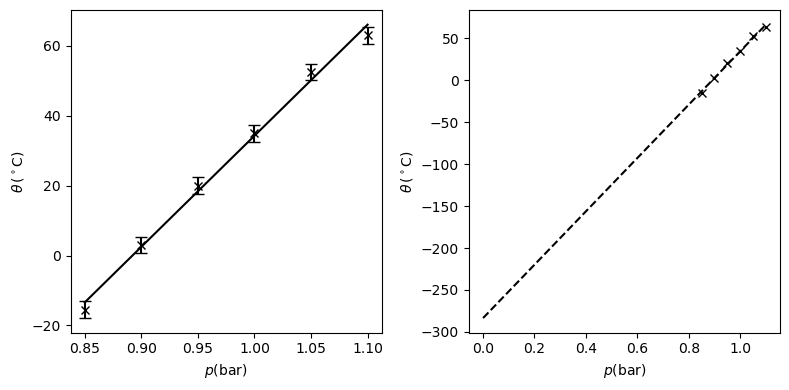

In [30]:
# Make a figure with two subplots, side by side
WIDTH, HEIGHT, DPI = 800, 400, 100
fig_kw = dict(figsize=(WIDTH/DPI, HEIGHT/DPI), dpi=DPI)
fig, ax = plt.subplots(nrows=1, ncols=2, **fig_kw)

# Left-hand plot: the fitted data with inferred error bars.
ax[0].errorbar(x, y, sigy, fmt='x', c='black', capsize=4)
xfit = np.array([x[0], x[-1]])
ax[0].plot(xfit, a + b*xfit, 'k')
ax[0].set_xlabel(r'$p \mathrm{(bar)}$')
ax[0].set_ylabel(r'$\theta \, \mathrm{(^\circ C)}$')

# Right-hadn plot: the extrapolation back to absolute zero
ax[1].plot(x, y, 'x', c='black')
xfit = np.array([0, x[-1]])
ax[1].plot(xfit, a + b*xfit, 'k--')
ax[1].set_xlabel(r'$p \mathrm{(bar)}$')
ax[1].set_ylabel(r'$\theta \,\mathrm{(^\circ C)}$')
ax[1].set_xlim()
plt.tight_layout()
plt.show()